<a href="https://colab.research.google.com/github/Dani-CSS/analise_espacial_homicidios-SP/blob/main/An%C3%A1lise_espacial_Homic%C3%ADdios_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importando e visualizando informações gerais do dataset

In [3]:
df = pd.read_excel("/Homicidio_2017_2022 (3).xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DEPARTAMENTO_CIRCUNSCRICAO  3044 non-null   object        
 1   SECCIONAL_CIRCUNSCRICAO     3044 non-null   object        
 2   MUNICIPIO_CIRCUNSCRICAO     3044 non-null   object        
 3   DP_CIRCUNSCRICAO            3044 non-null   object        
 4   HD                          2909 non-null   float64       
 5   Nº DE VÍT HD                3044 non-null   int64         
 6   ID_DELEGACIA                3044 non-null   int64         
 7   MÊS ESTATISTICA             3044 non-null   int64         
 8   ANO ESTATISTICA             3044 non-null   int64         
 9   DATAHORA_REGISTRO_BO        3044 non-null   datetime64[ns]
 10  NUM_BO                      3044 non-null   object        
 11  ANO_BO                      3044 non-null   int64       

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


#Analisando variáveis isoladamente

In [4]:
df["COR_PELE"].unique()

array(['Parda', 'Preta', 'Ignorada', 'Vermelha', 'Branca', 'Amarela', nan,
       'Outros'], dtype=object)

In [5]:
df["IDADE_PESSOA"].unique()

array([34, 21, 48, nan, 36, 28, 38, 37, 22, 33, 26, 43, 23, 45, 31, 54,
       47, 30, 50, 51, 46, 27, 39, 41, 53, 18, 17, 77, 44, 20, 16, 58, 15,
       42, 66, 83, 35, 40, 25, 49, 59, 71, 3, 29, 63, 32, 19, 65, 70, 52,
       56, 24, 6, 13, 55, 57, 2, 14, 79, 1, 69, 81, 75, 60, 4, 78, 64, 0,
       61, 12, 68, 62, 85, 84, 82, 67, 10, 76, 73, 5, 87, 74, 'NULL ', 11,
       8, 72, 80], dtype=object)

In [6]:
# Substitui strings por nan
df["IDADE_PESSOA"] = df["IDADE_PESSOA"].apply(pd.to_numeric, errors='coerce')
# Média
print("Média: "+str(df["IDADE_PESSOA"].mean()))
# Substitui nan pela média
df["IDADE_PESSOA"] = df["IDADE_PESSOA"].fillna(int(df["IDADE_PESSOA"].mean()))
print("Numero de nans: "+ str(df["IDADE_PESSOA"].isna().sum()))

Média: 36.20383086375136
Numero de nans: 0


#Soma dos dados com valor null

In [7]:
df.isnull().sum()

DEPARTAMENTO_CIRCUNSCRICAO       0
SECCIONAL_CIRCUNSCRICAO          0
MUNICIPIO_CIRCUNSCRICAO          0
DP_CIRCUNSCRICAO                 0
HD                             135
Nº DE VÍT HD                     0
ID_DELEGACIA                     0
MÊS ESTATISTICA                  0
ANO ESTATISTICA                  0
DATAHORA_REGISTRO_BO             0
NUM_BO                           0
ANO_BO                           0
MUNICIPIO_ELABORACAO             0
DP_ELABORACAO                    0
SEC_ELABORACAO                   0
DEP_ELABORACAO                   0
DATA_FATO                        0
HORA_FATO                        0
DESC_TIPOLOCAL                   4
LOGRADOURO                       0
NUMERO_LOGRADOURO              697
LATITUDE                       785
LONGITUDE                      785
TIPO_PESSOA                      0
SEXO_PESSOA                      0
IDADE_PESSOA                     0
DATA_NASCIMENTO_PESSOA         281
COR_PELE                         2
PROFISSAO           

In [8]:
#transforma as colunas em intergers ignorando os nans
df["Nº DE VÍT HD"] = df["Nº DE VÍT HD"].apply(pd.to_numeric, errors='coerce',downcast="integer")
df["HD"] = df["HD"].apply(pd.to_numeric, errors='coerce',downcast="integer")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DEPARTAMENTO_CIRCUNSCRICAO  3044 non-null   object        
 1   SECCIONAL_CIRCUNSCRICAO     3044 non-null   object        
 2   MUNICIPIO_CIRCUNSCRICAO     3044 non-null   object        
 3   DP_CIRCUNSCRICAO            3044 non-null   object        
 4   HD                          2909 non-null   float64       
 5   Nº DE VÍT HD                3044 non-null   int64         
 6   ID_DELEGACIA                3044 non-null   int64         
 7   MÊS ESTATISTICA             3044 non-null   int64         
 8   ANO ESTATISTICA             3044 non-null   int64         
 9   DATAHORA_REGISTRO_BO        3044 non-null   datetime64[ns]
 10  NUM_BO                      3044 non-null   object        
 11  ANO_BO                      3044 non-null   int64       

In [10]:
df.columns

Index(['DEPARTAMENTO_CIRCUNSCRICAO', 'SECCIONAL_CIRCUNSCRICAO',
       'MUNICIPIO_CIRCUNSCRICAO', 'DP_CIRCUNSCRICAO ', 'HD', 'Nº DE VÍT HD',
       'ID_DELEGACIA', 'MÊS ESTATISTICA', 'ANO ESTATISTICA',
       'DATAHORA_REGISTRO_BO', 'NUM_BO', 'ANO_BO', 'MUNICIPIO_ELABORACAO',
       'DP_ELABORACAO', 'SEC_ELABORACAO', 'DEP_ELABORACAO', 'DATA_FATO',
       'HORA_FATO', 'DESC_TIPOLOCAL', 'LOGRADOURO', 'NUMERO_LOGRADOURO',
       'LATITUDE', 'LONGITUDE', 'TIPO_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA',
       'DATA_NASCIMENTO_PESSOA', 'COR_PELE', 'PROFISSAO', 'NATUREZA_APURADA'],
      dtype='object')

In [11]:
df[["Nº DE VÍT HD","SEXO_PESSOA"]].groupby("SEXO_PESSOA").sum()

,Nº DE VÍT HD
SEXO_PESSOA,
Feminino,416
Indefinido,47
Masculino,2581


#BoxPlot das variáveis SEXO PESSOA, IDADE PESSOA, COR DA PELE

<ipython-input-12-90f802c17bd4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.boxplot(x="SEXO_PESSOA", y="IDADE_PESSOA",data= df, palette="flare")


[Text(0.5, 0, 'Sexo'), Text(0, 0.5, 'Idade'), Text(0.5, 1.0, 'Plot')]

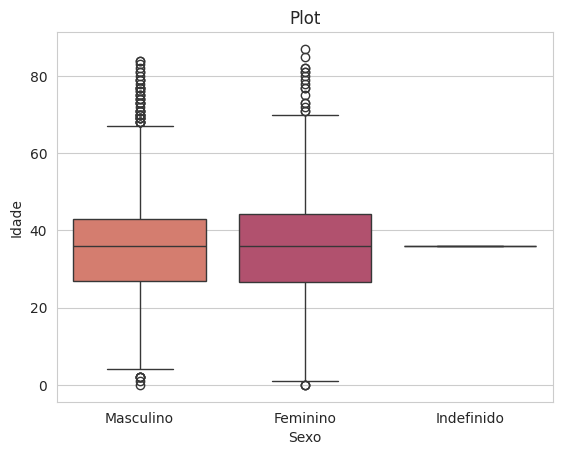

In [12]:
import seaborn as sns

sns.set_style("whitegrid")
plot = sns.boxplot(x="SEXO_PESSOA", y="IDADE_PESSOA",data= df, palette="flare")
plot.set(xlabel ="Sexo", ylabel = "Idade", title ='Plot')

<ipython-input-13-3dda1ace5edf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.boxplot(x="COR_PELE", y="IDADE_PESSOA",data= df, palette="flare")


[Text(0.5, 0, 'Cor da pele'), Text(0, 0.5, 'Idade'), Text(0.5, 1.0, 'Boxplot')]

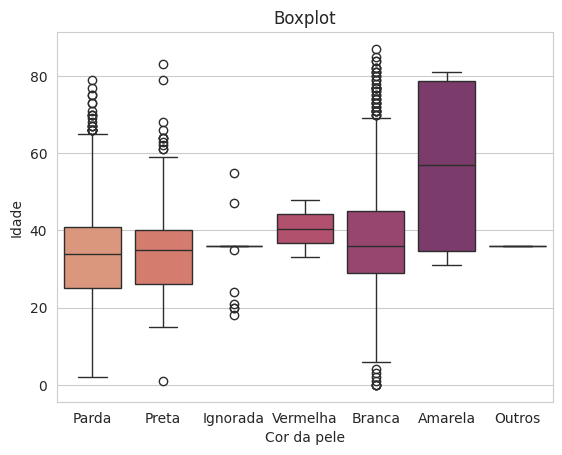

In [13]:
sns.set_style("whitegrid")
plot = sns.boxplot(x="COR_PELE", y="IDADE_PESSOA",data= df, palette="flare")
plot.set(xlabel ="Cor da pele", ylabel = "Idade", title ='Boxplot')

#Histograma variável SEXO PESSOA

[Text(0.5, 0, 'Idade'),
 Text(0, 0.5, 'Nº de pessoas'),
 Text(0.5, 1.0, 'Histograma')]

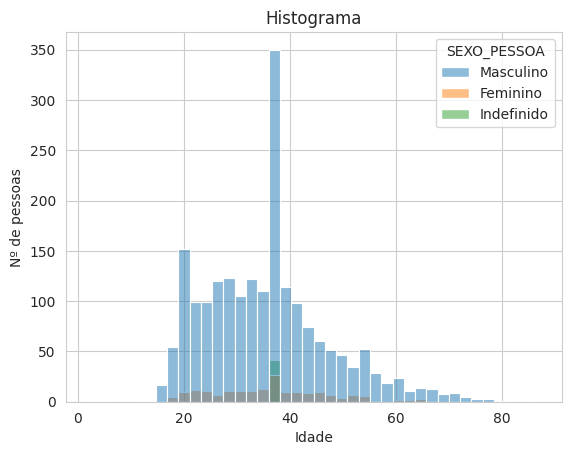

In [81]:
sns.set_style("whitegrid")
plot = sns.histplot(x="IDADE_PESSOA",data= df,hue="SEXO_PESSOA")
plot.set(xlabel ="Idade", ylabel = "Nº de pessoas", title ='Histograma')

#Criando a coluna GEOMETRY com os dados georeferenciados

In [15]:
df= df.dropna(subset=['LATITUDE', 'LONGITUDE'])

In [16]:
from shapely.geometry import Point
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)


In [17]:
df['geometry']= None
for index, row in df.iterrows():
    df.loc[index, 'geometry']= Point(row.LONGITUDE, row.LATITUDE)

In [20]:
df.head()

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,HD,Nº DE VÍT HD,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,...,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,geometry
0,DECAP,1ª SEC,São Paulo,001 DP - Sé,1.0,1,10108,1,2022,2022-01-20 09:45:00,...,-23.550235,-46.639255,Vítima,Masculino,34.0,1987-02-15,Parda,DESEMPREGADO,HOMICÍDIO DOLOSO,POINT (-46.639254567 -23.550234533)
1,DECAP,1ª SEC,São Paulo,002 DP - Bom Retiro,1.0,1,10102,1,2022,2022-01-16 00:00:00,...,-23.525989,-46.634852,Vítima,Masculino,21.0,2000-06-10,Parda,NaN,HOMICÍDIO DOLOSO,POINT (-46.6348518039999 -23.525989324)
2,DECAP,1ª SEC,São Paulo,002 DP - Bom Retiro,1.0,1,10102,1,2022,2022-01-22 00:00:00,...,-23.528916,-46.633914,Vítima,Masculino,48.0,1974-01-06,Parda,AUTONOMO(A),HOMICÍDIO DOLOSO,POINT (-46.633914106 -23.528915969)
3,DECAP,1ª SEC,São Paulo,003 DP - Campos Elísios,1.0,1,10102,1,2022,2022-01-01 00:00:00,...,-23.542956,-46.641287,Vítima,Masculino,36.0,NaT,Parda,NaN,HOMICÍDIO DOLOSO,POINT (-46.6412873619777 -23.5429562495111)
4,DECAP,1ª SEC,São Paulo,003 DP - Campos Elísios,1.0,1,10102,1,2022,2022-01-01 00:00:00,...,-23.538712,-46.645445,Vítima,Masculino,36.0,NaT,Preta,NaN,HOMICÍDIO DOLOSO,POINT (-46.6454452020952 -23.5387120224126)


In [ ]:
!pip install geopandas
import geopandas as gpd


#Importando o geodataframe para plotar o mapa do estado de São Paulo

In [21]:
gdf=gpd.GeoDataFrame(df, geometry='geometry')

In [22]:
gdf.head()

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,HD,Nº DE VÍT HD,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,...,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,geometry
0,DECAP,1ª SEC,São Paulo,001 DP - Sé,1.0,1,10108,1,2022,2022-01-20 09:45:00,...,-23.550235,-46.639255,Vítima,Masculino,34.0,1987-02-15,Parda,DESEMPREGADO,HOMICÍDIO DOLOSO,POINT (-46.63925 -23.55023)
1,DECAP,1ª SEC,São Paulo,002 DP - Bom Retiro,1.0,1,10102,1,2022,2022-01-16 00:00:00,...,-23.525989,-46.634852,Vítima,Masculino,21.0,2000-06-10,Parda,NaN,HOMICÍDIO DOLOSO,POINT (-46.63485 -23.52599)
2,DECAP,1ª SEC,São Paulo,002 DP - Bom Retiro,1.0,1,10102,1,2022,2022-01-22 00:00:00,...,-23.528916,-46.633914,Vítima,Masculino,48.0,1974-01-06,Parda,AUTONOMO(A),HOMICÍDIO DOLOSO,POINT (-46.63391 -23.52892)
3,DECAP,1ª SEC,São Paulo,003 DP - Campos Elísios,1.0,1,10102,1,2022,2022-01-01 00:00:00,...,-23.542956,-46.641287,Vítima,Masculino,36.0,NaT,Parda,NaN,HOMICÍDIO DOLOSO,POINT (-46.64129 -23.54296)
4,DECAP,1ª SEC,São Paulo,003 DP - Campos Elísios,1.0,1,10102,1,2022,2022-01-01 00:00:00,...,-23.538712,-46.645445,Vítima,Masculino,36.0,NaT,Preta,NaN,HOMICÍDIO DOLOSO,POINT (-46.64545 -23.53871)


In [23]:
somatorio = gdf[["HD","MUNICIPIO_CIRCUNSCRICAO","Nº DE VÍT HD","geometry"]].groupby("MUNICIPIO_CIRCUNSCRICAO").sum()
somatorio.reset_index(inplace=True)
somatorio.head

<ipython-input-23-8fe2590bb4df>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  somatorio = gdf[["HD","MUNICIPIO_CIRCUNSCRICAO","Nº DE VÍT HD","geometry"]].groupby("MUNICIPIO_CIRCUNSCRICAO").sum()


<bound method NDFrame.head of     MUNICIPIO_CIRCUNSCRICAO   HD  Nº DE VÍT HD
0                    Adolfo  1.0             1
1                     Aguaí  2.0             2
2                    Agudos  3.0             3
3               Altinópolis  1.0             1
4                 Americana  7.0             9
..                      ...  ...           ...
299                 Vinhedo  4.0             4
300              Votorantim  3.0             3
301             Votuporanga  2.0             2
302         Várzea Paulista  2.0             2
303         Álvares Machado  3.0             3

[304 rows x 3 columns]>

In [24]:
somatorio[["MUNICIPIO_CIRCUNSCRICAO"]]

,MUNICIPIO_CIRCUNSCRICAO
0,Adolfo
1,Aguaí
2,Agudos
3,Altinópolis
4,Americana
...,...
299,Vinhedo
300,Votorantim
301,Votuporanga
302,Várzea Paulista


In [25]:
somatorio

,MUNICIPIO_CIRCUNSCRICAO,HD,Nº DE VÍT HD
0,Adolfo,1.0,1
1,Aguaí,2.0,2
2,Agudos,3.0,3
3,Altinópolis,1.0,1
4,Americana,7.0,9
...,...,...,...
299,Vinhedo,4.0,4
300,Votorantim,3.0,3
301,Votuporanga,2.0,2
302,Várzea Paulista,2.0,2


In [27]:
for index, row in somatorio.iterrows():
  print(row["MUNICIPIO_CIRCUNSCRICAO"])

Adolfo
Aguaí
Agudos
Altinópolis
Americana
Américo Brasiliense
Andradina
Angatuba
Anhumas
Aparecida
Aparecida D'Oeste
Apiaí
Arapeí
Araraquara
Araras
Araçariguama
Araçatuba
Araçoiaba da Serra
Arealva
Areiópolis
Artur Nogueira
Arujá
Assis
Atibaia
Auriflama
Avanhandava
Avaré
Avaí
Bariri
Barretos
Barrinha
Barueri
Bastos
Bauru
Bebedouro
Bertioga
Birigui
Boituva
Bom Jesus dos Perdões
Botucatu
Bragança Paulista
Brejo Alegre
Brodowski
Brotas
Buri
Bálsamo
Cabreúva
Cachoeira Paulista
Cafelândia
Caieiras
Cajamar
Cajati
Cajuru
Campina do Monte Alegre
Campinas
Campo Limpo Paulista
Campos do Jordão
Cananéia
Canas
Capivari
Caraguatatuba
Carapicuíba
Casa Branca
Castilho
Catanduva
Caçapava
Cedral
Cerqueira César
Cerquilho
Chavantes
Clementina
Colina
Conchal
Conchas
Cordeirópolis
Corumbataí
Cosmópolis
Cotia
Cravinhos
Cruzeiro
Cubatão
Cunha
Descalvado
Diadema
Dracena
Duartina
Embu das Artes
Embu-Guaçu
Espírito Santo do Pinhal
Fernandópolis
Ferraz de Vasconcelos
Franca
Francisco Morato
Franco da Rocha
Garç

In [28]:
ggdf = gdf.groupby("MUNICIPIO_CIRCUNSCRICAO").sum()

<ipython-input-28-6b608a418b66>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ggdf = gdf.groupby("MUNICIPIO_CIRCUNSCRICAO").sum()


In [29]:
ggdf['geometry']= None
for index, row in ggdf.iterrows():
    ggdf.loc[index, 'geometry']= Point(row.LONGITUDE, row.LATITUDE)

In [30]:
ggdf.reset_index(inplace=True)

In [31]:
ggdf.head()

,MUNICIPIO_CIRCUNSCRICAO,HD,Nº DE VÍT HD,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,ANO_BO,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,IDADE_PESSOA,geometry
0,Adolfo,1.0,1,110401,1,2022,2022,1.0,-21.234976,-49.639459,36.0,POINT (-49.639458818 -21.2349757769999)
1,Aguaí,2.0,2,141400,14,4044,4044,259.0,-44.150820,-93.952149,54.0,POINT (-93.952148686 -44.150819702)
2,Agudos,3.0,3,180012,15,6066,6066,795.0,-67.426505,-146.927928,109.0,POINT (-146.92792798300002 -67.426504683)
3,Altinópolis,1.0,1,100401,4,2022,2022,1.0,-21.016935,-47.368211,29.0,POINT (-47.368211022 -21.0169352849999)
4,Americana,7.0,9,633109,47,18198,18198,2414.0,-204.504474,-425.318736,270.0,POINT (-425.3187359047007 -204.504474485958)


In [32]:
for index, row in ggdf.iterrows():
    for indexs,rows in gdf.iterrows():
        if ggdf.loc[index, 'MUNICIPIO_CIRCUNSCRICAO'] == gdf.loc[indexs, 'MUNICIPIO_CIRCUNSCRICAO']:
            ggdf.loc[index, 'geometry']  = gdf.loc[indexs, 'geometry']

In [33]:
gdf.head()

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,HD,Nº DE VÍT HD,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,...,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,geometry
0,DECAP,1ª SEC,São Paulo,001 DP - Sé,1.0,1,10108,1,2022,2022-01-20 09:45:00,...,-23.550235,-46.639255,Vítima,Masculino,34.0,1987-02-15,Parda,DESEMPREGADO,HOMICÍDIO DOLOSO,POINT (-46.63925 -23.55023)
1,DECAP,1ª SEC,São Paulo,002 DP - Bom Retiro,1.0,1,10102,1,2022,2022-01-16 00:00:00,...,-23.525989,-46.634852,Vítima,Masculino,21.0,2000-06-10,Parda,NaN,HOMICÍDIO DOLOSO,POINT (-46.63485 -23.52599)
2,DECAP,1ª SEC,São Paulo,002 DP - Bom Retiro,1.0,1,10102,1,2022,2022-01-22 00:00:00,...,-23.528916,-46.633914,Vítima,Masculino,48.0,1974-01-06,Parda,AUTONOMO(A),HOMICÍDIO DOLOSO,POINT (-46.63391 -23.52892)
3,DECAP,1ª SEC,São Paulo,003 DP - Campos Elísios,1.0,1,10102,1,2022,2022-01-01 00:00:00,...,-23.542956,-46.641287,Vítima,Masculino,36.0,NaT,Parda,NaN,HOMICÍDIO DOLOSO,POINT (-46.64129 -23.54296)
4,DECAP,1ª SEC,São Paulo,003 DP - Campos Elísios,1.0,1,10102,1,2022,2022-01-01 00:00:00,...,-23.538712,-46.645445,Vítima,Masculino,36.0,NaT,Preta,NaN,HOMICÍDIO DOLOSO,POINT (-46.64545 -23.53871)


In [38]:
import geopandas as gpd


In [ ]:
!pip install geobr

In [40]:
import geobr

In [41]:
sp = geobr.read_municipality(code_muni="SP", year=2020)

In [42]:
sp.head()

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,3500105.0,Adamantina,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-51.05425 -21.40465, -51.04624..."
1,3500204.0,Adolfo,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-49.65795 -21.20333, -49.65361..."
2,3500303.0,Aguaí,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-46.97640 -21.96818, -46.97399..."
3,3500402.0,Águas Da Prata,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-46.73501 -21.81891, -46.72649..."
4,3500501.0,Águas De Lindóia,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-46.60614 -22.44173, -46.60347..."


In [43]:
sp.shape

(645, 8)

In [44]:
sp = sp.rename(columns={'name_muni':"MUNICIPIO_CIRCUNSCRICAO"})

In [45]:
sp.head()

,code_muni,MUNICIPIO_CIRCUNSCRICAO,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,3500105.0,Adamantina,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-51.05425 -21.40465, -51.04624..."
1,3500204.0,Adolfo,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-49.65795 -21.20333, -49.65361..."
2,3500303.0,Aguaí,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-46.97640 -21.96818, -46.97399..."
3,3500402.0,Águas Da Prata,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-46.73501 -21.81891, -46.72649..."
4,3500501.0,Águas De Lindóia,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-46.60614 -22.44173, -46.60347..."


In [46]:
sp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   code_muni                645 non-null    float64 
 1   MUNICIPIO_CIRCUNSCRICAO  645 non-null    object  
 2   code_state               645 non-null    float64 
 3   abbrev_state             645 non-null    object  
 4   name_state               645 non-null    object  
 5   code_region              645 non-null    float64 
 6   name_region              645 non-null    object  
 7   geometry                 645 non-null    geometry
dtypes: float64(3), geometry(1), object(4)
memory usage: 40.4+ KB


In [47]:
some = 0
for i in somatorio["MUNICIPIO_CIRCUNSCRICAO"]:
    for j in sp["MUNICIPIO_CIRCUNSCRICAO"]:
        if i == j:
            some+=1

some

267

In [48]:
new_df = pd.merge(somatorio,sp,how="outer",on="MUNICIPIO_CIRCUNSCRICAO")

In [49]:
new_df.head()

,MUNICIPIO_CIRCUNSCRICAO,HD,Nº DE VÍT HD,code_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,Adolfo,1.0,1.0,3500204.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-49.65795 -21.20333, -49.65361..."
1,Aguaí,2.0,2.0,3500303.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-46.97640 -21.96818, -46.97399..."
2,Agudos,3.0,3.0,3500709.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-48.91186 -22.33956, -48.91156..."
3,Altinópolis,1.0,1.0,3501004.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-47.41212 -20.80914, -47.40639..."
4,Americana,7.0,9.0,3501608.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-47.26869 -22.67097, -47.26124..."


In [50]:
new_df["Nº DE VÍT HD"]

0      1.0
1      2.0
2      3.0
3      1.0
4      9.0
      ... 
677    NaN
678    NaN
679    NaN
680    NaN
681    NaN
Name: Nº DE VÍT HD, Length: 682, dtype: float64

In [51]:
new_df["Nº DE VÍT HD"] = new_df["Nº DE VÍT HD"].fillna(1)

In [52]:
new_df.columns

Index(['MUNICIPIO_CIRCUNSCRICAO', 'HD', 'Nº DE VÍT HD', 'code_muni',
       'code_state', 'abbrev_state', 'name_state', 'code_region',
       'name_region', 'geometry'],
      dtype='object')

In [53]:
new_df.head

<bound method NDFrame.head of     MUNICIPIO_CIRCUNSCRICAO   HD  Nº DE VÍT HD  code_muni  code_state  \
0                    Adolfo  1.0           1.0  3500204.0        35.0   
1                     Aguaí  2.0           2.0  3500303.0        35.0   
2                    Agudos  3.0           3.0  3500709.0        35.0   
3               Altinópolis  1.0           1.0  3501004.0        35.0   
4                 Americana  7.0           9.0  3501608.0        35.0   
..                      ...  ...           ...        ...         ...   
677               Viradouro  NaN           1.0  3556800.0        35.0   
678    Vista Alegre Do Alto  NaN           1.0  3556909.0        35.0   
679          Vitória Brasil  NaN           1.0  3556958.0        35.0   
680                Zacarias  NaN           1.0  3557154.0        35.0   
681            Estiva Gerbi  NaN           1.0  3557303.0        35.0   

    abbrev_state name_state  code_region name_region  \
0             SP  São Paulo          

<Axes: >

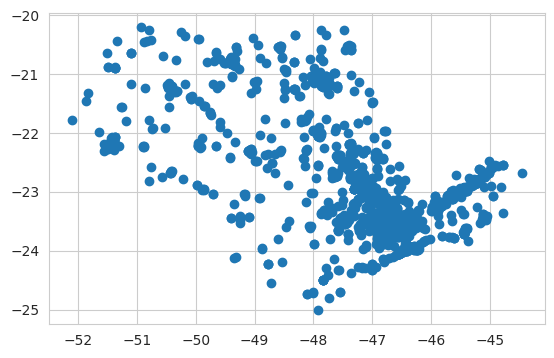

In [54]:
gdf.plot()

In [55]:
ggdf.head()

,MUNICIPIO_CIRCUNSCRICAO,HD,Nº DE VÍT HD,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,ANO_BO,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,IDADE_PESSOA,geometry
0,Adolfo,1.0,1,110401,1,2022,2022,1.0,-21.234976,-49.639459,36.0,POINT (-49.639458818 -21.2349757769999)
1,Aguaí,2.0,2,141400,14,4044,4044,259.0,-44.150820,-93.952149,54.0,POINT (-46.974072755 -22.080643817)
2,Agudos,3.0,3,180012,15,6066,6066,795.0,-67.426505,-146.927928,109.0,POINT (-48.9636996 -22.4769499)
3,Altinópolis,1.0,1,100401,4,2022,2022,1.0,-21.016935,-47.368211,29.0,POINT (-47.368211022 -21.0169352849999)
4,Americana,7.0,9,633109,47,18198,18198,2414.0,-204.504474,-425.318736,270.0,POINT (-47.199659 -22.7282216)


#Visualização da distribuição espacial dos homicídios no estado de São Paulo

[]

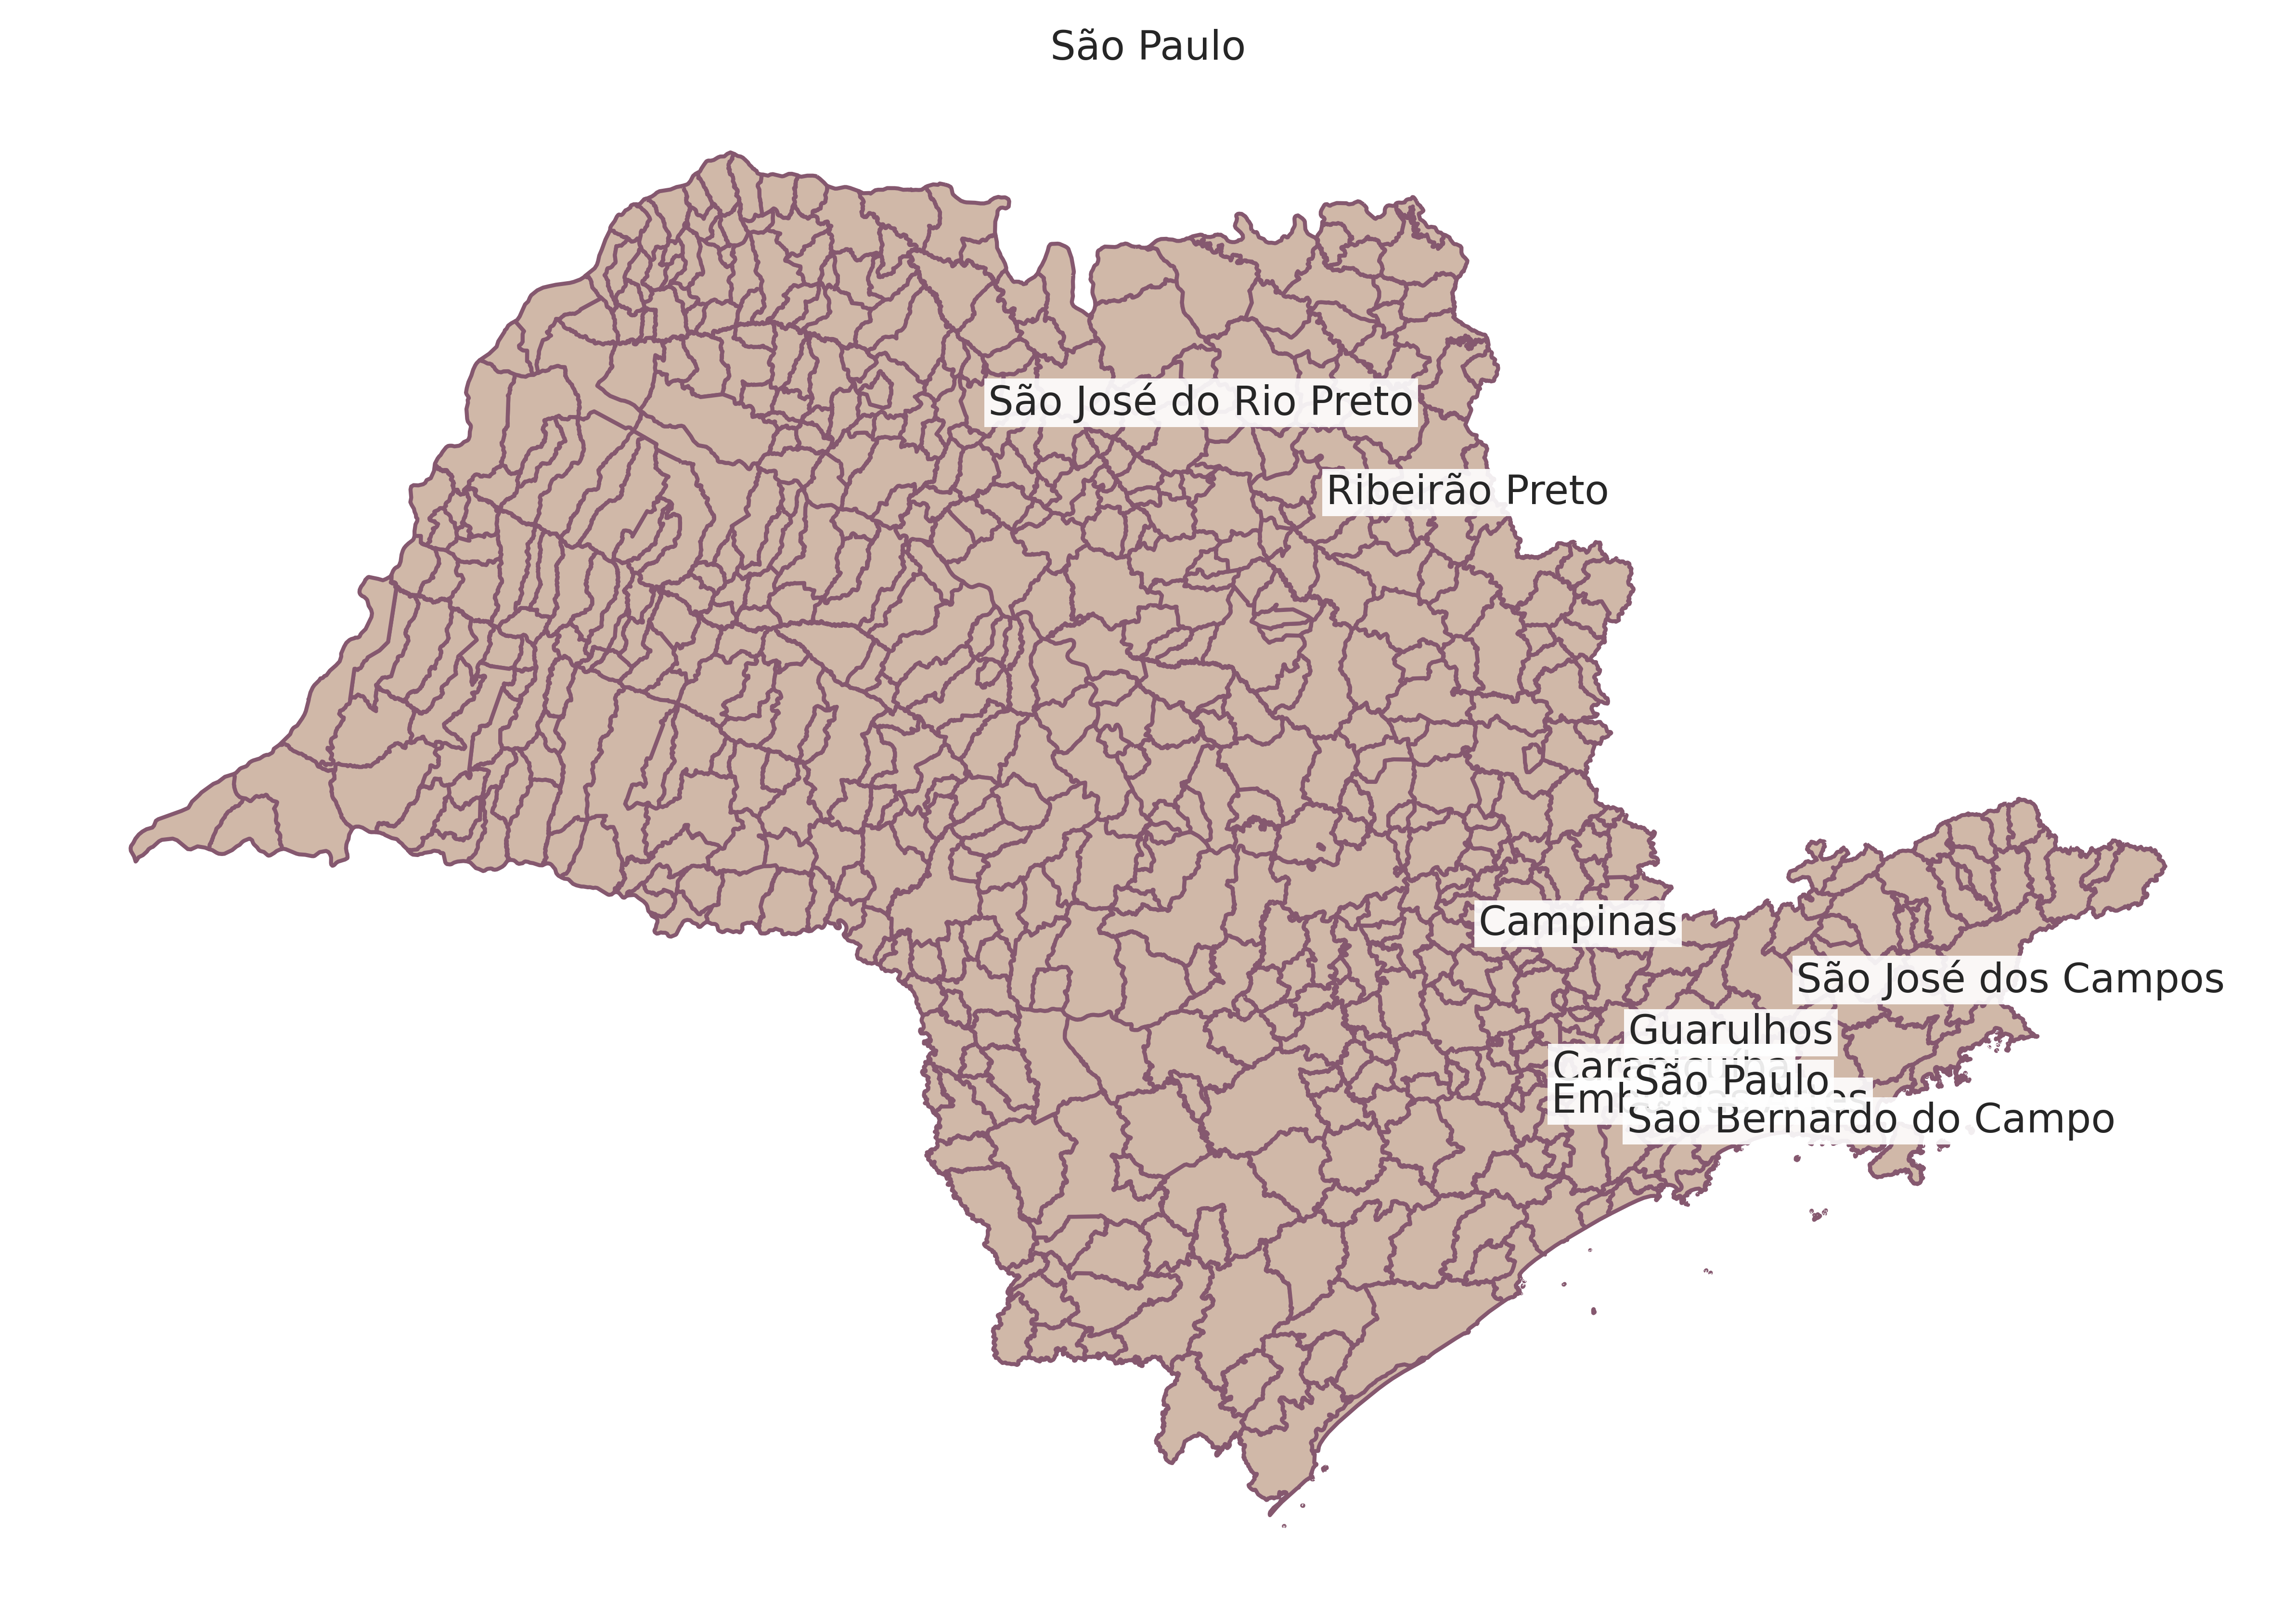

In [57]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=600)

sp.plot(ax=ax,facecolor="#D0B8A8", edgecolor="#85586F")
ggdf['Nº DE VÍT HD'] = ggdf['Nº DE VÍT HD'].astype(float)
ax.set_title("São Paulo", fontsize=10)
ax.axis("off")


for idx, row in ggdf.iterrows():
    i = 1
    if row['Nº DE VÍT HD'] >30:
        plt.text(row['geometry'].x, row['geometry'].y,s= row['MUNICIPIO_CIRCUNSCRICAO'], bbox=dict(boxstyle='square,pad=0.1', fc='white', ec='none',alpha=0.9)) # 300m x offset added.

plt.plot()

(-34.050000000000004, 715.05, -177864.1, 3735168.1)

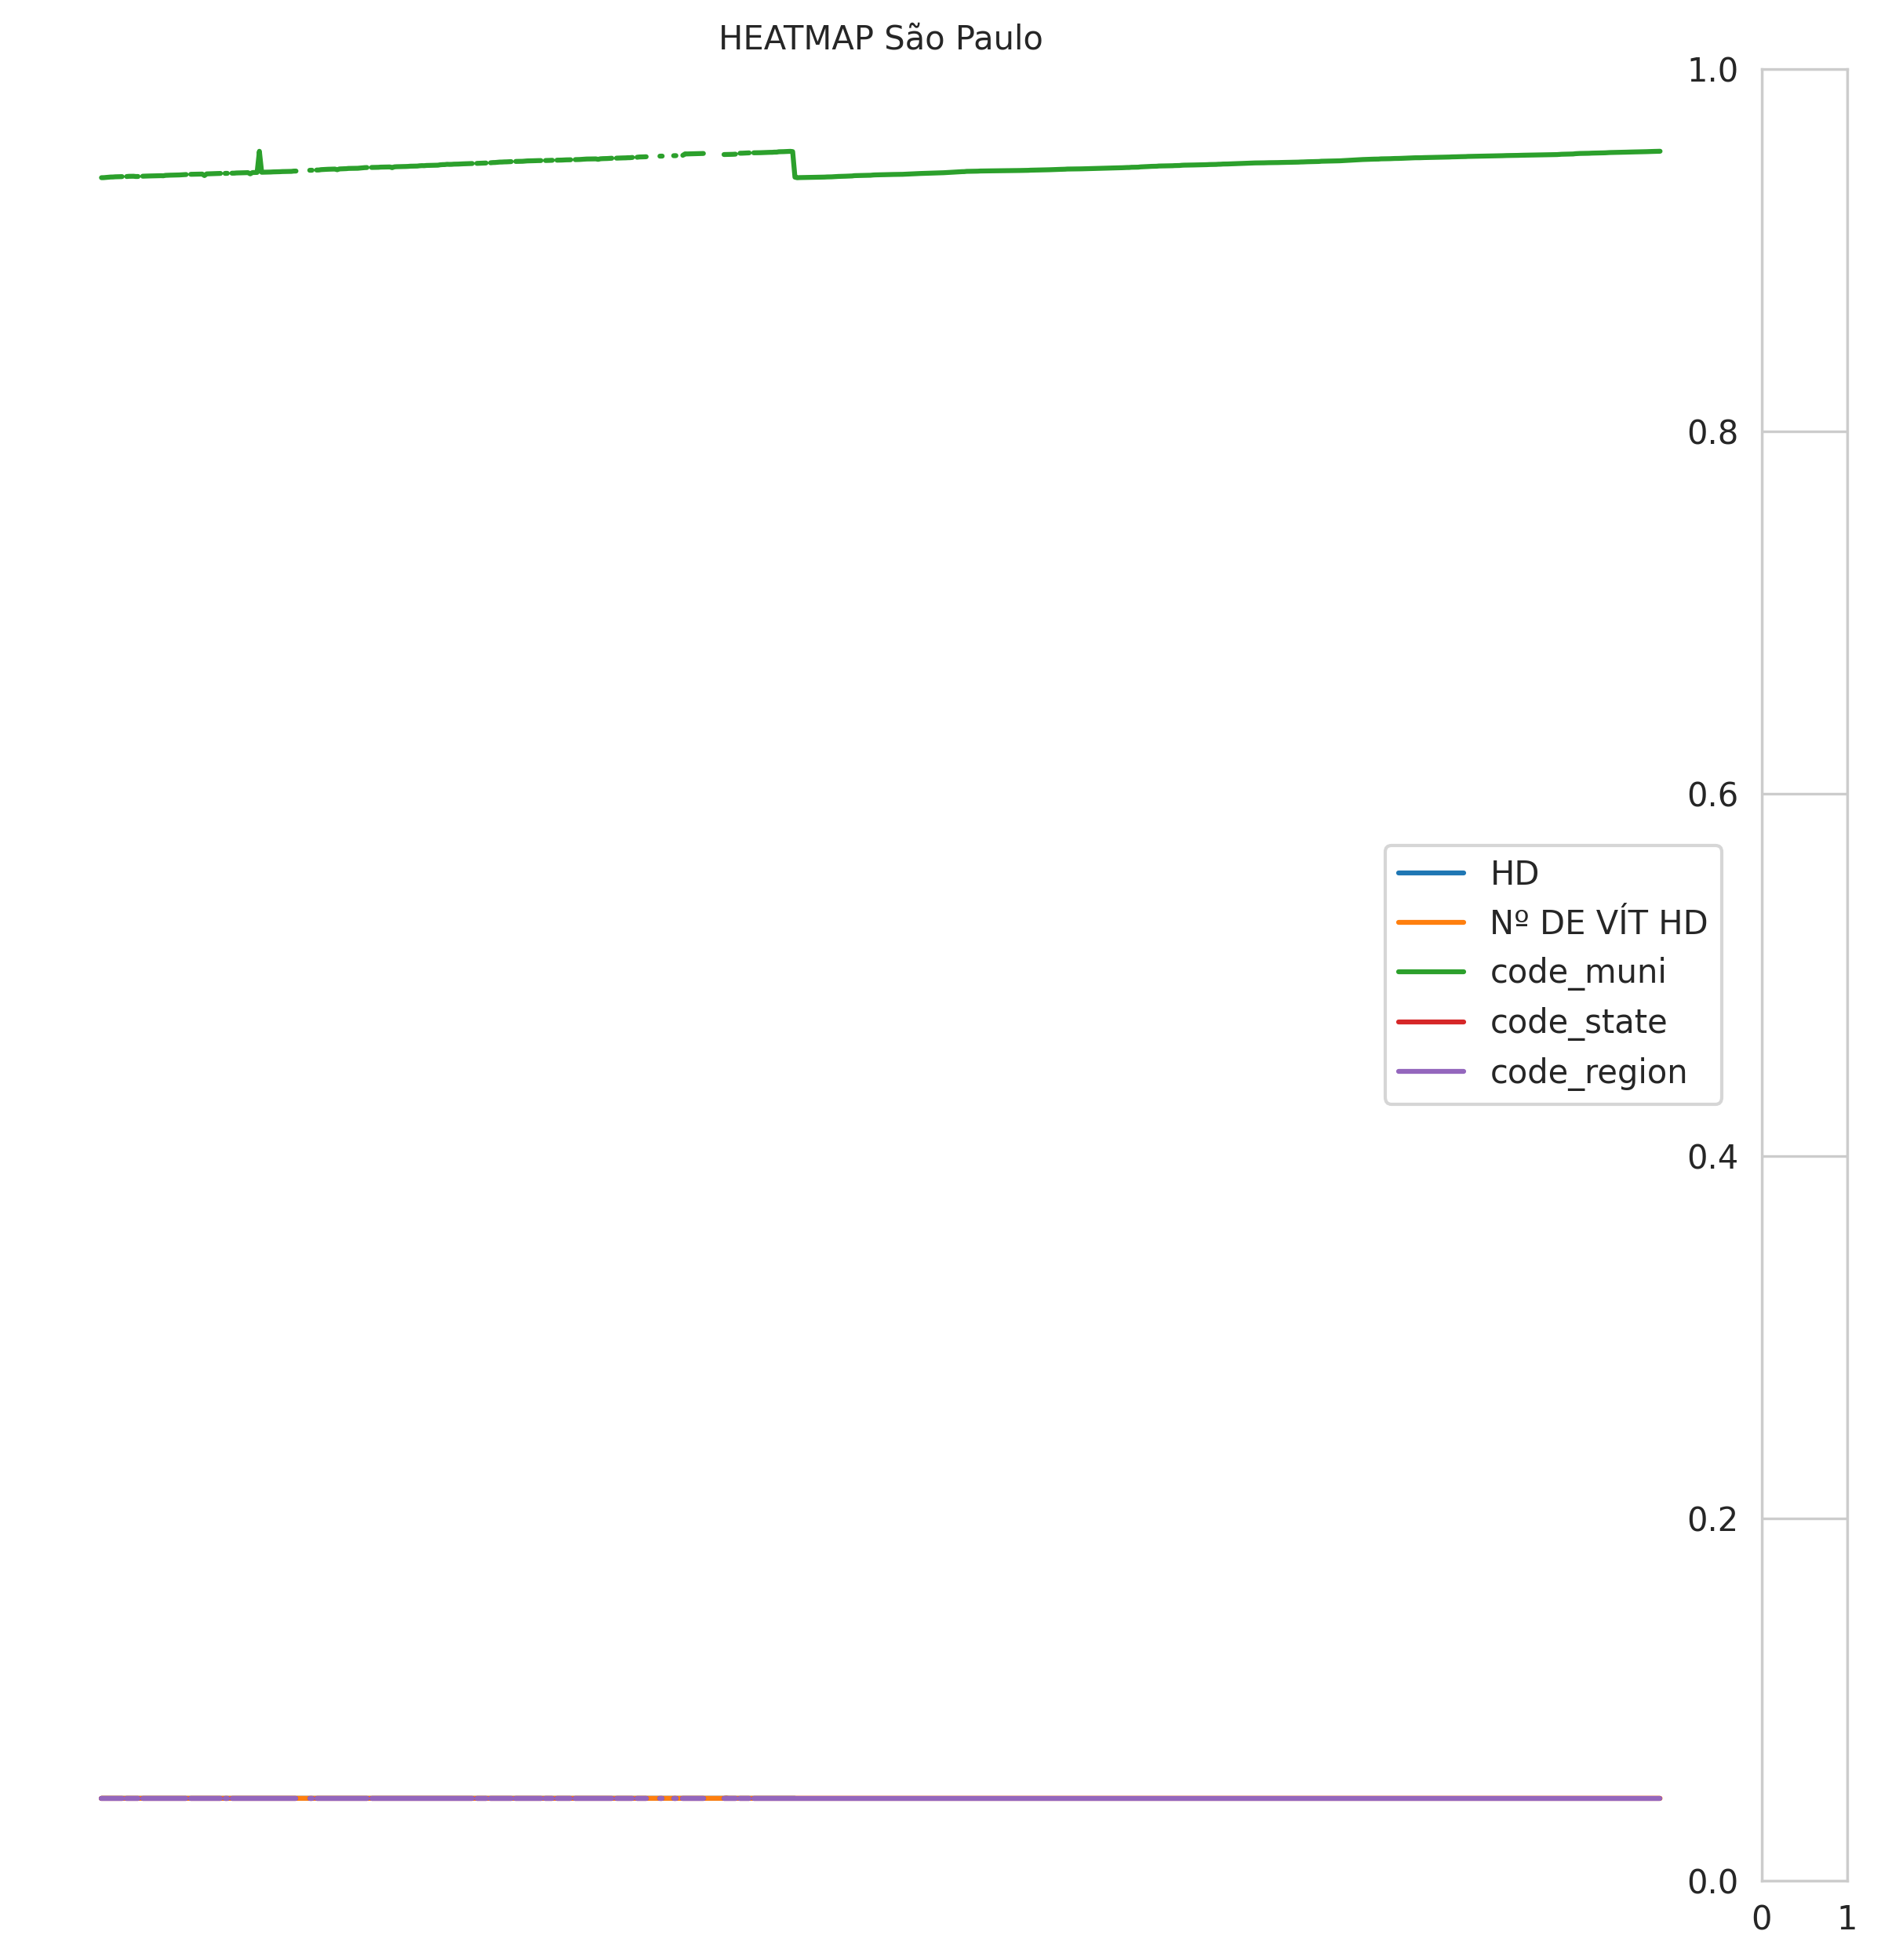

In [80]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

new_df.plot(column='Nº DE VÍT HD', ax=ax, legend=True)
ax.set_title("HEATMAP São Paulo", fontsize=10)
ax.axis("off")



In [ ]:
"""Importando as funções que são utilizadas para plotar visualizações relacionadas à análise de autocorrelação espacial, como gráficos de dispersão de Moran,
clusters LISA (Local Indicators of Spatial Association) e visualizações de autocorrelação espacial local. Essas ferramentas são importantes para entender os padrões de
autocorrelação espacial presentes nos dados.
"""

!pip install libpysal
!pip install esda
!pip install splot

In [70]:
import libpysal
import splot
from libpysal.weights import Queen
import esda
from esda import Moran, Moran_Local, G_Local
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation

In [71]:
new_gdf = gpd.GeoDataFrame(new_df, geometry=new_df["geometry"])

In [72]:
new_gdf

,MUNICIPIO_CIRCUNSCRICAO,HD,Nº DE VÍT HD,code_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,Adolfo,1.0,1.0,3500204.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-49.65795 -21.20333, -49.65361..."
1,Aguaí,2.0,2.0,3500303.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-46.97640 -21.96818, -46.97399..."
2,Agudos,3.0,3.0,3500709.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-48.91186 -22.33956, -48.91156..."
3,Altinópolis,1.0,1.0,3501004.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-47.41212 -20.80914, -47.40639..."
4,Americana,7.0,9.0,3501608.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-47.26869 -22.67097, -47.26124..."
...,...,...,...,...,...,...,...,...,...,...
677,Viradouro,NaN,1.0,3556800.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-48.23257 -20.82254, -48.23421..."
678,Vista Alegre Do Alto,NaN,1.0,3556909.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-48.63824 -21.13941, -48.62188..."
679,Vitória Brasil,NaN,1.0,3556958.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-50.46615 -20.15770, -50.45301..."
680,Zacarias,NaN,1.0,3557154.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-49.99275 -21.03884, -49.98651..."


#### Limpar onde é nan

In [73]:
points_clean = new_gdf.loc[new_gdf.is_valid]

In [74]:
points_clean

,MUNICIPIO_CIRCUNSCRICAO,HD,Nº DE VÍT HD,code_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,Adolfo,1.0,1.0,3500204.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-49.65795 -21.20333, -49.65361..."
1,Aguaí,2.0,2.0,3500303.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-46.97640 -21.96818, -46.97399..."
2,Agudos,3.0,3.0,3500709.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-48.91186 -22.33956, -48.91156..."
3,Altinópolis,1.0,1.0,3501004.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-47.41212 -20.80914, -47.40639..."
4,Americana,7.0,9.0,3501608.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-47.26869 -22.67097, -47.26124..."
...,...,...,...,...,...,...,...,...,...,...
677,Viradouro,NaN,1.0,3556800.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-48.23257 -20.82254, -48.23421..."
678,Vista Alegre Do Alto,NaN,1.0,3556909.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-48.63824 -21.13941, -48.62188..."
679,Vitória Brasil,NaN,1.0,3556958.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-50.46615 -20.15770, -50.45301..."
680,Zacarias,NaN,1.0,3557154.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-49.99275 -21.03884, -49.98651..."


In [75]:
new_gdf[101:]

,MUNICIPIO_CIRCUNSCRICAO,HD,Nº DE VÍT HD,code_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
101,Guarujá,16.0,16.0,3518701.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-46.27069 -24.04989, -46.27108..."
102,Guarulhos,55.0,56.0,3518800.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-46.36332 -23.27507, -46.36199..."
103,Guaíra,2.0,2.0,3517406.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-48.44859 -20.12878, -48.44199..."
104,Hortolândia,16.0,18.0,3519071.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-47.23011 -22.82591, -47.22173..."
105,Ibaté,4.0,4.0,3519303.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-47.96811 -21.82068, -47.96474..."
...,...,...,...,...,...,...,...,...,...,...
677,Viradouro,NaN,1.0,3556800.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-48.23257 -20.82254, -48.23421..."
678,Vista Alegre Do Alto,NaN,1.0,3556909.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-48.63824 -21.13941, -48.62188..."
679,Vitória Brasil,NaN,1.0,3556958.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-50.46615 -20.15770, -50.45301..."
680,Zacarias,NaN,1.0,3557154.0,35.0,SP,São Paulo,3.0,Sudeste,"MULTIPOLYGON (((-49.99275 -21.03884, -49.98651..."


In [76]:
# obter matriz de vizinhança no formato queen
w = Queen.from_dataframe(points_clean, silence_warnings=True)
w.transform = 'r'
# calcular I de Moran global para a variável escolhida
y = points_clean["Nº DE VÍT HD"].copy()
moran = Moran(y, w)
moran.I

<ipython-input-76-432f3ff2352f>:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(points_clean, silence_warnings=True)


0.0972374718402408

In [77]:
moran_loc = Moran_Local(y, w)

/usr/local/lib/python3.10/dist-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


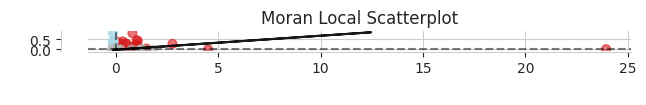

In [78]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel(" ")
ax.set_ylabel(" ")
plt.show()

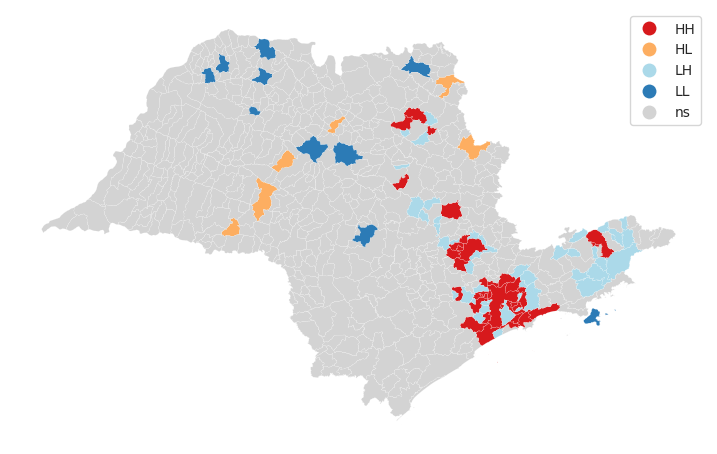

In [79]:
lisa_cluster(moran_loc, points_clean, p=0.05, figsize=(9,9))
plt.show()